# 1. Solving Maxwell's Equations Numerically

The following notebook uses the `micromax` package to solve Maxwell's equations numerically.  The material properties, sampling grid, illumination source, and refractive index (permittivity) need to be specified.  The results are plotted using the `proplot` package.

In [45]:
import macromax

import numpy as np
import proplot as pplt
# %matplotlib notebook  # Uncomment this line in an iPython Jupyter notebook

#
# Define the initial radiation properties (wavelength and polarization)
#
wavelength = 500e-9  # [ m ] In SI units as everything else here
source_polarization = np.array([0, 1, 0])[:, np.newaxis]  # y-polarized

# Specifying the sampling grid
nb_samples = 1024
sample_pitch = wavelength / 10  # [ m ]  # Sub-sample for display
boundary_thickness = 5e-6  # [ m ]
x_range = sample_pitch * np.arange(nb_samples) - boundary_thickness  # [ m ]

# Define the medium as a spatially-variant permittivity
# Don't forget absorbing boundary:
dist_in_boundary = np.maximum(0, np.maximum(-x_range,
                                            x_range - (x_range[-1] - boundary_thickness)
                                            ) / boundary_thickness)


# This defines the characteristics of the medium
#permittivity, permeability, and the two coupling factors
# the permability default is 0.
refractive_index = 1.3001 + 0.1j * dist_in_boundary
#permittivity = 1.0 + 0.01j * dist_in_boundary  # unit-less, relative to vacuum permittivity
# glass has a refractive index of about 1.5
#permittivity[(x_range >= 20e-6) & (x_range < 30e-6)] += 1.5**2
#permittivity = permittivity[np.newaxis, np.newaxis, ...]  # Define an isotropic material
refractive_index[(x_range >= 15e-6) & (x_range < 25e-6)] += 1.3 + 0.01j
refractive_index = refractive_index[np.newaxis, np.newaxis, ...]  # Define an isotropic material

# Define the illumination source
#
# point source at x = 0
current_density = source_polarization * (np.abs(x_range) < sample_pitch/4)

#
# Solve Maxwell's equations
#
# (the actual work is done in this line)
solution = macromax.solve(x_range, vacuum_wavelength=wavelength,
                          current_density=current_density, refractive_index=refractive_index)


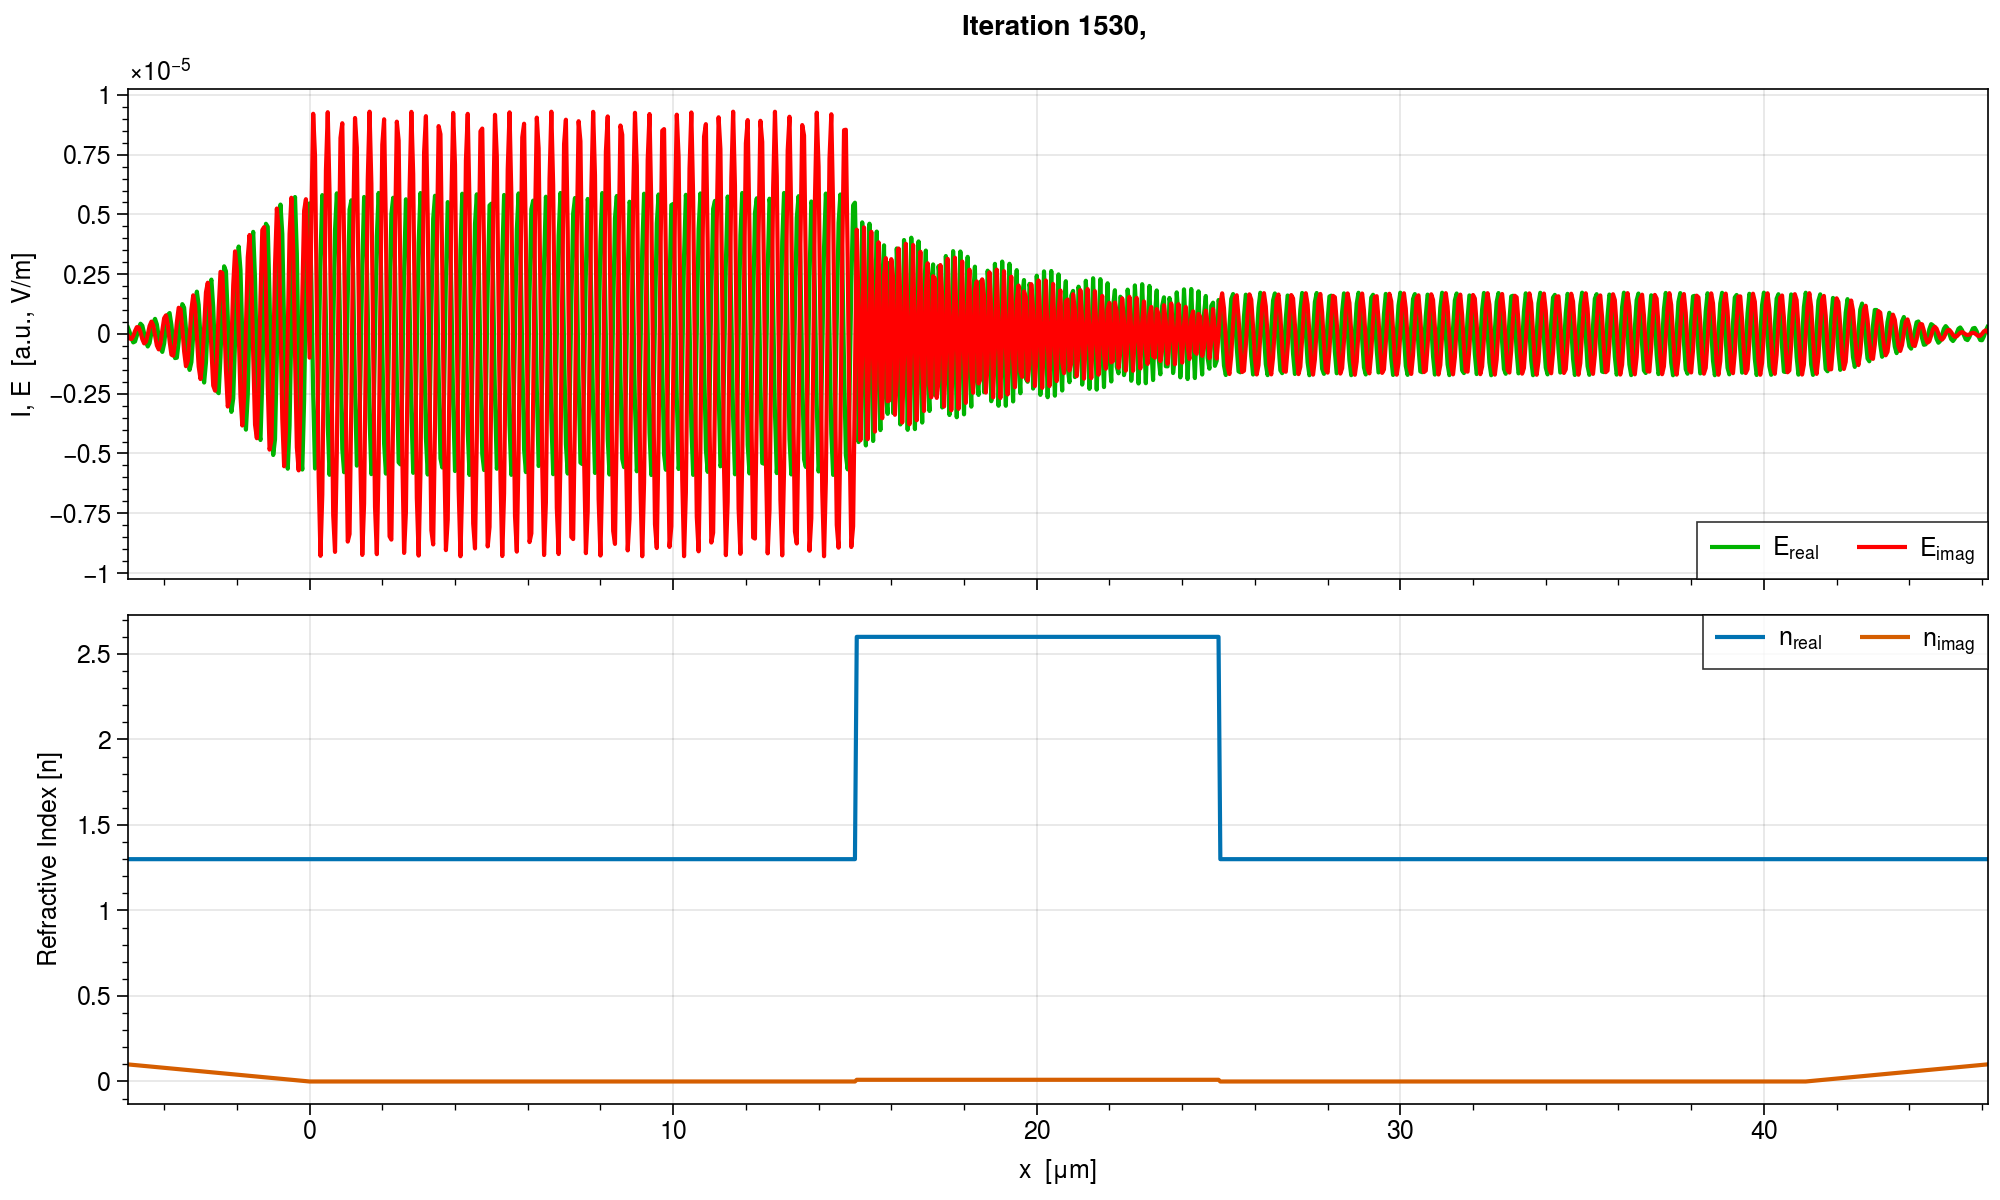

In [71]:
#
# Display the results
#
fig, axs = pplt.subplots(nrows=2, ncols=1, frameon=False, figsize=(10, 6), sharex=True, sharey=False)

figure_title = "Iteration %d, " % solution.iteration
fig.format(suptitle=figure_title)

x_range = solution.grid[0]  # coordinates
E = solution.E[1, :]  # Electric field in y
H = solution.H[2, :]  # Magnetizing field in z
B = solution.B[2, :]
S = solution.S[0, :]  # Poynting vector in x
f = solution.f[0, :]  # Optical force in x

# Display the field for the polarization dimension
field_to_display = E
max_val_to_display = np.amax(np.abs(field_to_display))
poynting_normalization = np.amax(np.abs(S)) / max_val_to_display
#axs[0].plot(x_range * 1e6,
#           np.abs(field_to_display) ** 2 / max_val_to_display,
#           color=[0, 0, 0], label='I')
#axs[0].plot(x_range * 1e6, np.real(S) / poynting_normalization,
#           color=[1, 0, 1], label='$S_{real}$')
axs[0].plot(x_range * 1e6, np.real(field_to_display),
           color=[0, 0.7, 0], label='$E_{real}$')
axs[0].plot(x_range * 1e6, np.imag(field_to_display),
           color=[1, 0, 0], label='$E_{imag}$')
axs[0].format(ylabel="I, E  [a.u., V/m]", xlabel="x  [$\mu$m]", xlim=(x_range[[0, -1]] * 1e6))

axs[0].legend(loc='lower right', ncol=4)

axs[1].plot(x_range[-1] * 2e6, 0,
           color=[0, 0, 0])
axs[1].plot(x_range[-1] * 2e6, 0,
           color=[1, 0, 1])
axs[1].plot(x_range[-1] * 2e6, 0,
           color=[0, 0.7, 0])
axs[1].plot(x_range[-1] * 2e6, 0,
           color=[1, 0, 0])
#axs[1].plot(x_range * 1e6, permittivity[0, 0].real,
#           color=[0, 0, 1], label='$\epsilon_{real}$')
#axs[1].plot(x_range * 1e6, permittivity[0, 0].imag,
#           color=[0, 0.5, 0.5], label='$\epsilon_{imag}$')
axs[1].plot(x_range * 1e6, refractive_index[0, 0].real, label='$n_{real}$')
axs[1].plot(x_range * 1e6, refractive_index[0, 0].imag, label='$n_{imag}$')
axs[1].set_xlabel('x  [$\mu$m]')
axs[1].set_ylabel('Refractive Index [$n$]')
axs[1].set_xlim(x_range[[0, -1]] * 1e6)
axs[1].legend(loc='upper right')
#plt.tight_layout()
#plt.show()  # Not needed for iPython Jupyter notebook#

In [17]:
solution.wavenumber

12566370.614359174

/var/folders/51/n1wsvkk55p1dlnwf9sh8t3bw0000gn/T/ipykernel_47225/3396265459.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


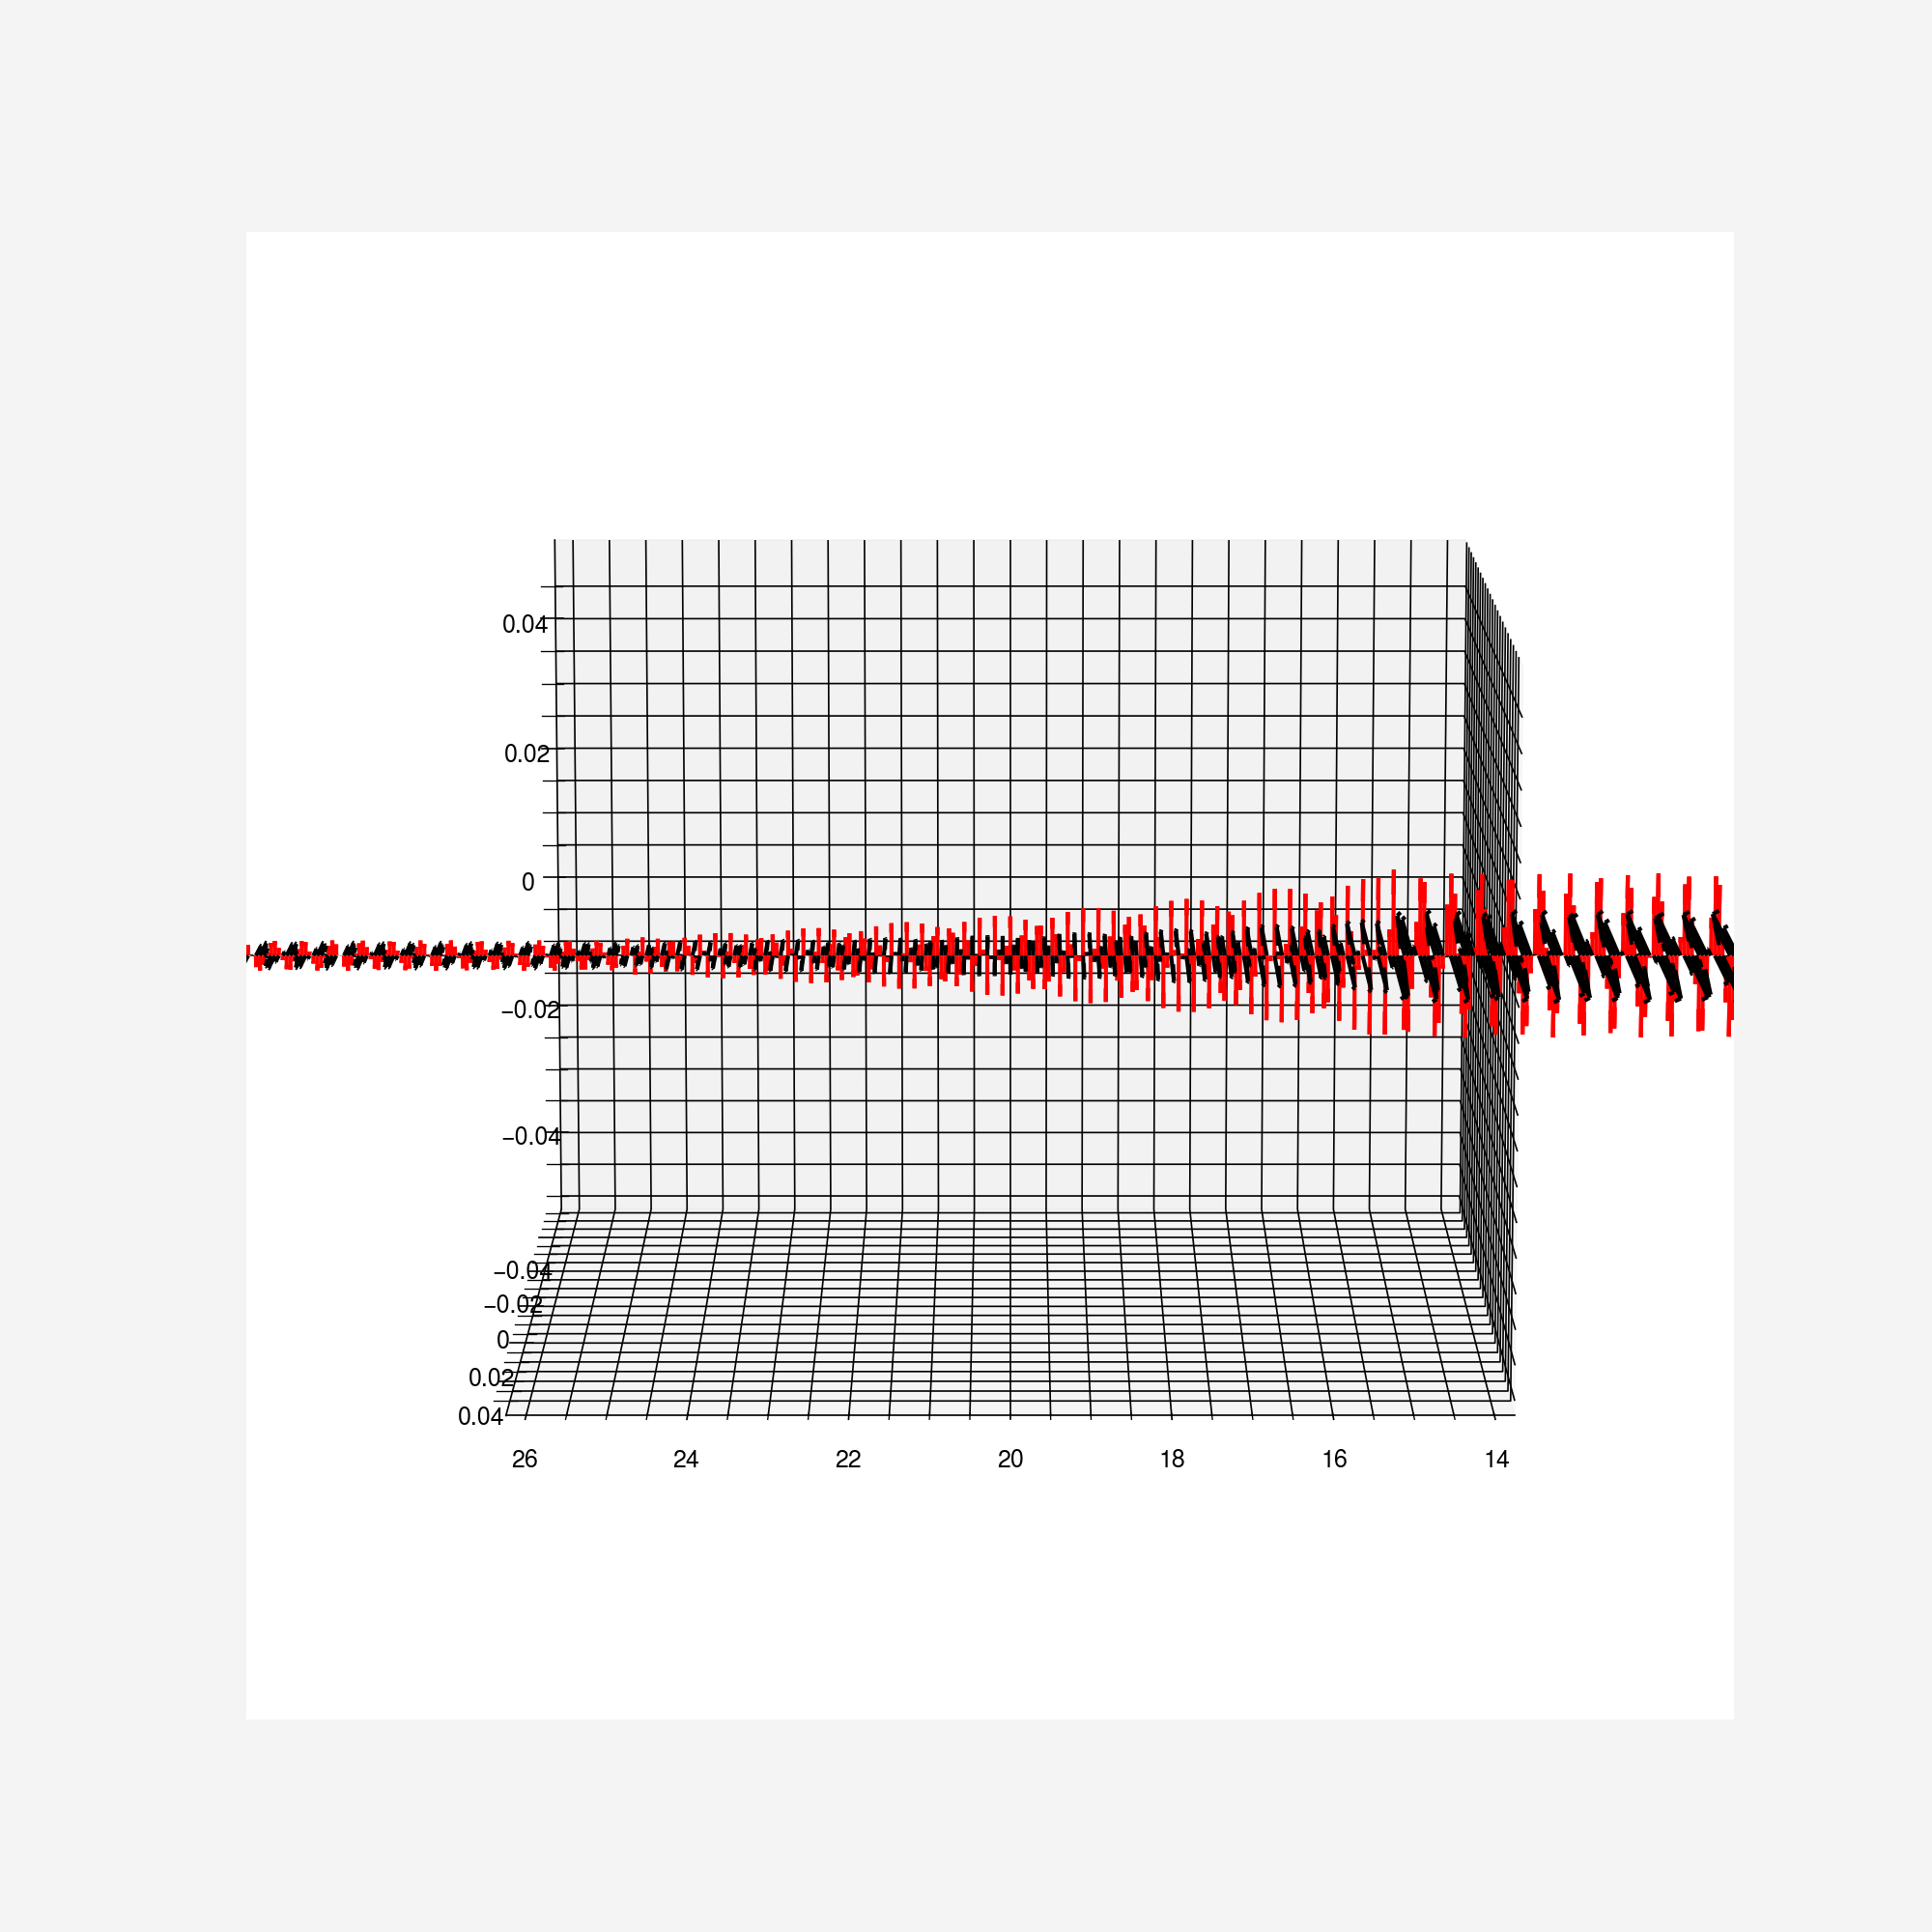

In [84]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))


ax.quiver(x_range*1e6, 0, 0, 0, E, 0, length=5000, color='k')
ax.quiver(x_range*1e6, 0, 0, 0, 0, B, length=300000000000, color='r')

ax.set_xlim(14,26)
ax.view_init(10,90)
plt.show()